## Matthew Benvenuto
## Morgan Acevedo
## Mutasim Mim
## Qinying Chen
## Wayne Nguyen

## Problem 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [ ]:
#Load the training and test zip datasets
#train_data = pd.read_csv('C:\\Users\\mutas\\Downloads\\datasets_export\\zipcode\\zip.train')
train_data = pd.read_csv('/content/zip.train')
train_data = train_data.sample(frac=1)

#test_data = pd.read_csv('C:\\Users\\mutas\\Downloads\\datasets_export\\zipcode\\zip.test')
test_data = pd.read_csv('/content/zip.test')
test_data = test_data.sample(frac=1)

In [ ]:
X_train = []
y_train = []
"""For every line in the training data, we split the digit id 
and the grayscale values. Then, we put the grayscale values into a separate list. 
Then, add all digit id to X_train and all grayscale values to y_train."""

for i in range(train_data.shape[0]):
  data = train_data.iloc[i, :][0]
  data = data.split(' ')
  d, im = int(float(data[0])), data[1:-1]
  
  im = [float(val) for val in im]
  #im = np.array(im).reshape(16,16)
  X_train.append(im)
  y_train.append(d)

X_train = [np.array(entry) for entry in X_train]
#X_train = np.array(X_train).reshape(len(X_train),1)
#y_train = np.array(y_train).reshape(len(y_train),1)

In [ ]:
X_test = []
y_test = []
"""For every line in the testing data, we split the digit id 
and the grayscale values. Then, we put the grayscale values into a separate list. 
Then, add all digit id to X_test and all grayscale values to y_test."""

for i in range(test_data.shape[0]):
  data = test_data.iloc[i, :][0]
  data = data.split(' ')
  d, im = int(float(data[0])), data[1:]
  #im = data[:-1]

  im = [float(val) for val in im]
  #im = np.array(im).reshape(16,16)
  X_test.append(im)
  y_test.append(d)

X_test = [np.array(entry) for entry in X_test]
X_test = np.array(X_test)
#y_test = np.array(y_test)

In [ ]:
#Plot some of the handwritten digits. The pictures look good.

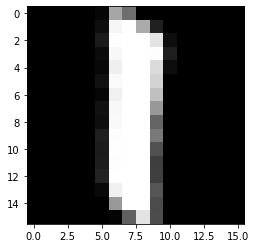

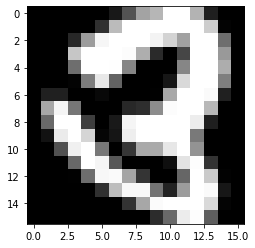

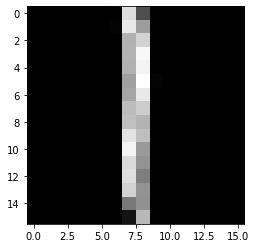

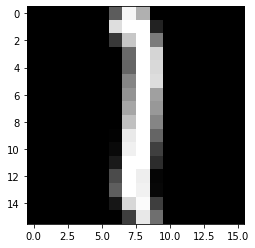

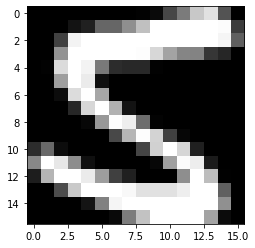

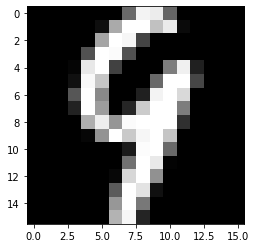

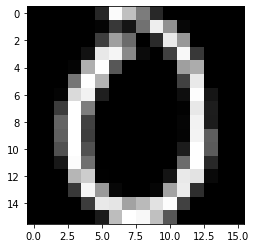

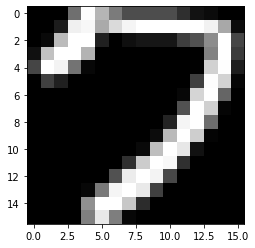

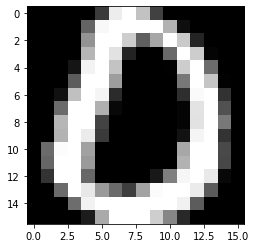

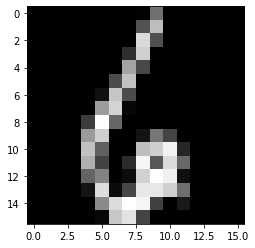

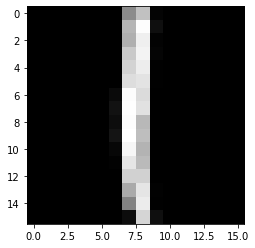

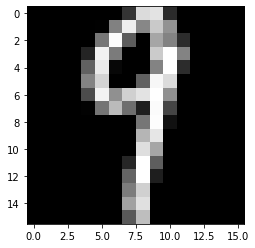

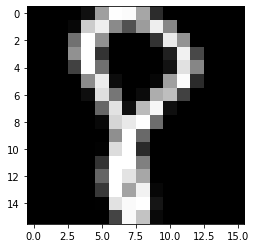

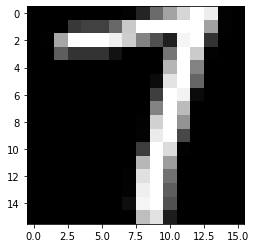

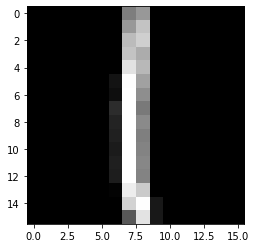

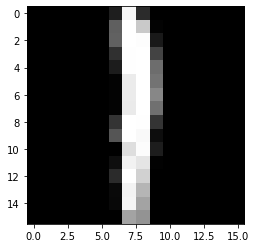

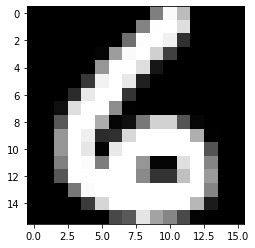

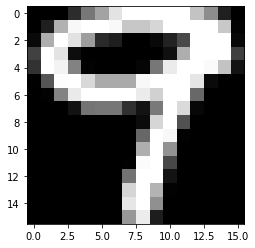

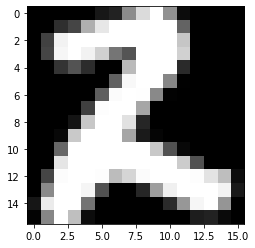

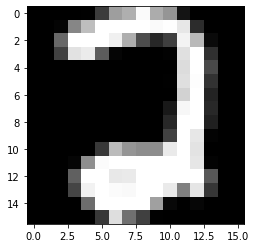

In [ ]:
for im in X_train[:20]:
  plt.imshow(im.reshape(16,16))
  plt.pause(0.2)

In [ ]:
#Apply our code from lab 5
class myknn_3(BaseEstimator):
  def __init__(self,k=3, lmbda=0.4):
    self.k = k
    self.lmbda = lmbda
  
  def fit(self, X, y):
    self.X = X
    self.y = y
    self.n = len(X)
    '''We are analyzing the k nearest neighbors for each and every point. For each point, we compute the weight for k nearest region for all the types.
    Each type is assigned a weight and the type with the highest weight is the type for that region(with predicted point). We repeat the process on all of the data points.'''
     
  def predict(self,X_):
    k = self.k
    m = len(X_)
    lmbda = self.lmbda
    yhat = np.array(m*[0])
    X = self.X
    y = self.y
    n = self.n
    #We are building a distance class and sorting them.
  
    for l in range(m):
      x = X_[l]
      dists_classes = []
      for i in range(n):
        d = D(X[i], x)
        #c = y[i][0]
        c = y[i]
        dists_classes.append([d,c])
      dists_classes = sorted(dists_classes)
      dists_classes = dists_classes[:k]

     #We are making a dictionary of the sum of the weights corresponding to the type.
      kk = 10
      weights = {}
      for j in range(kk):
        weights[j] = 0
      
      for j in range(k):
        d, c = dists_classes[j][0], dists_classes[j][1]
        w = float(np.exp(-1*lmbda*d))
        weights[c] += w

      max_class = 0
      #We are getting the position of the max_class.
      for j in range(kk):
        if weights[j] > weights[max_class]:
          max_class = j
      #We are filling the predicted array with the max_class.
      yhat[l] = max_class
      

    return yhat
      #The score is defined by how many matches are predicted array have with the actual array.
  def score(self, X,y):
    yhat = self.predict(X)
    counter = 0
    for i in range(len(y)):
      if y[i] == yhat[i]:
        counter += 1
    #print(counter)
    return counter/len(y)
  
  def get_params(self,  deep):
      return {'k': self.k}
    
  def set_params(self, **parameters):
    for parameter, value in parameters.items():
      setattr(self,parameter, value)
    return self

In [ ]:
#Compute the accuracy of the optimal model
inds = np.random.randint(0,len(X_train), 500)
X_train_new = [X_train[ind] for ind in inds]
y_train_new = [y_train[ind] for ind in inds]

model = myknn_3()
cv = GridSearchCV(model, param_grid={'k':[1,2,3,4], 'lmbda':[0.1,0.2,.3,0.5,1,2]}, cv = 3)
cv.fit(X_train_new,y_train_new)

GridSearchCV(cv=3, estimator=myknn_3(),
             param_grid={'k': [1, 2, 3, 4],
                         'lmbda': [0.1, 0.2, 0.3, 0.5, 1, 2]})

In [ ]:
cv.best_score_

0.9060313108722314

In [ ]:
cv.best_params_

{'k': 3, 'lmbda': 1}

In [ ]:
#Optimal model using myknn()
best_model = cv.best_estimator_
best_model.score(X_test, y_test)

0.8778664007976071

In [ ]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors' : [i for i in range(2,6)],
    'weights': ['uniform', 'distance'],
    'p' : [1,1.5, 2],
    'n_jobs': [-1],
    'metric' : ['euclidean','manhattan']
}
cv = GridSearchCV(knn, param_grid=params, cv=3)
cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [2, 3, 4, 5], 'p': [1, 1.5, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
cv.cv_results_

{'mean_fit_time': array([0.0129648 , 0.01229954, 0.01163395, 0.0113008 , 0.01529392,
        0.01363055, 0.0142951 , 0.01329621, 0.01080887, 0.01348289,
        0.01063808, 0.01480937, 0.01130223, 0.01229938, 0.01127744,
        0.01196424, 0.01030787, 0.01096892, 0.01163626, 0.0099806 ,
        0.01130311, 0.00964069, 0.01263356, 0.01063776, 0.01329899,
        0.01497181, 0.01296512, 0.01163626, 0.01263499, 0.01130271,
        0.01961549, 0.01429542, 0.0129652 , 0.01196678, 0.0146277 ,
        0.01429478, 0.01296536, 0.01230129, 0.01230113, 0.01296473,
        0.01595775, 0.01230065, 0.00963871, 0.01097043, 0.01263396,
        0.01362967, 0.01546264, 0.01429454]),
 'std_fit_time': array([0.0014113 , 0.00124547, 0.00169367, 0.00047239, 0.00338958,
        0.00169477, 0.00234994, 0.00187801, 0.00023041, 0.00229292,
        0.00169522, 0.00063975, 0.00093988, 0.00169434, 0.0026418 ,
        0.00080848, 0.00047418, 0.00140787, 0.00169548, 0.00140744,
        0.00261562, 0.00094004, 0.001

In [ ]:
cv.cv_results_['mean_test_score']

array([0.95747599, 0.9654321 , 0.95747599, 0.9654321 , 0.95747599,
       0.9654321 , 0.96186557, 0.96378601, 0.96186557, 0.96378601,
       0.96186557, 0.96378601, 0.95816187, 0.96447188, 0.95816187,
       0.96447188, 0.95816187, 0.96447188, 0.95857339, 0.95953361,
       0.95857339, 0.95953361, 0.95857339, 0.95953361, 0.94650206,
       0.95679012, 0.94650206, 0.95679012, 0.94650206, 0.95679012,
       0.95226337, 0.95486968, 0.95226337, 0.95486968, 0.95226337,
       0.95486968, 0.94609053, 0.95432099, 0.94609053, 0.95432099,
       0.94609053, 0.95432099, 0.94883402, 0.94965706, 0.94883402,
       0.94965706, 0.94883402, 0.94965706])

In [ ]:
cv.best_score_

0.9654320987654321

In [ ]:
cv.best_params_

{'metric': 'euclidean',
 'n_jobs': -1,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

In [ ]:
model = cv.best_estimator_

In [ ]:
#Optimal model using the standard knn()
model.score(X_test, y_test)

0.9436689930209372

## Problem 2

In [ ]:
from scipy import ndimage

In [ ]:
#Generate some rotations of the image with small angles (-4,-2,0,2,4) and add to the training data.
X_rotations = []
y_rotations = []
angles = [-4,-2,0,2,4]

for n in range(len(X_train)):
  im = X_train[n]
  im = im.reshape(16,16)
  for angle in angles:
    #print(im.shape)
    #im_ = ''
    im_ = ndimage.rotate(im, angle, reshape=False)
    X_rotations.append(im_.reshape(256,))
    y_rotations.append(y_train[n])

In [ ]:
results = []
best_params = []
for i in range(10):
  inds = np.random.randint(0,len(X_rotations), 500)
  X_train_new = [X_rotations[ind] for ind in inds]
  y_train_new = [y_rotations[ind] for ind in inds]

  knn = KNeighborsClassifier()
  params = {
    'n_neighbors' : [j for j in range(1,5)],
    'weights': ['uniform', 'distance'],
    'p' : [1, 1.5, 2, 2.5,3],
    'n_jobs': [-1],
    'metric' : ['euclidean']
  }
  cv = GridSearchCV(knn, param_grid=params, cv=3)
  cv.fit(X_train_new,y_train_new)

  print("Round :", i)
  results.append(cv.cv_results_)
  best_params.append(cv.best_params_)
  print('mean test scores: ', cv.cv_results_['mean_test_score'])
  print('best score: ', cv.best_score_)
  print('best parameters: ', cv.best_params_)

Round : 0
mean test scores:  [0.83999471 0.83999471 0.83999471 0.83999471 0.83999471 0.83999471
 0.83999471 0.83999471 0.83999471 0.83999471 0.81801457 0.83999471
 0.81801457 0.83999471 0.81801457 0.83999471 0.81801457 0.83999471
 0.81801457 0.83999471 0.81403458 0.83403073 0.81403458 0.83403073
 0.81403458 0.83403073 0.81403458 0.83403073 0.81403458 0.83403073
 0.80400644 0.8379987  0.80400644 0.8379987  0.80400644 0.8379987
 0.80400644 0.8379987  0.80400644 0.8379987 ]
best score:  0.8399947093764277
best parameters:  {'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Round : 1
mean test scores:  [0.85795878 0.85795878 0.85795878 0.85795878 0.85795878 0.85795878
 0.85795878 0.85795878 0.85795878 0.85795878 0.8159344  0.85795878
 0.8159344  0.85795878 0.8159344  0.85795878 0.8159344  0.85795878
 0.8159344  0.85795878 0.83394656 0.85593872 0.83394656 0.85593872
 0.83394656 0.85593872 0.83394656 0.85593872 0.83394656 0.85593872
 0.83193853 0.85595075 0

In [ ]:
model = KNeighborsClassifier()
model.fit(X_rotations,y_rotations)
model.set_params(n_neighbors=1, n_jobs=-1, p = 1, metric='euclidean', weights='uniform')
print(model.score(X_test, y_test))
print(model.get_params())

0.9441674975074775
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [ ]:
model = KNeighborsClassifier()
model.fit(X_rotations,y_rotations)
model.set_params(n_neighbors=4, n_jobs=-1, p = 1, metric='euclidean', weights='distance')
print(model.score(X_test, y_test))
print(model.get_params())

0.9476570289132602
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [ ]:
inds = np.random.randint(0,len(X_rotations), 500)
X_train_new = [X_rotations[ind] for ind in inds]
y_train_new = [y_rotations[ind] for ind in inds]

model = myknn_3()
cv = GridSearchCV(model, param_grid={'k':[1,2,3,4], 'lmbda':[0.1,0.2,.3,0.5,1,2]}, cv = 3)
cv.fit(X_train_new,y_train_new)

GridSearchCV(cv=3, estimator=myknn_3(),
             param_grid={'k': [1, 2, 3, 4],
                         'lmbda': [0.1, 0.2, 0.3, 0.5, 1, 2]})

In [ ]:
best_model = cv.best_estimator_

In [ ]:
#Looks like the rotations are not really helpful on this dataset.
best_model.score(X_test, y_test)

0.8379860418743769